In [40]:
# imports and defaults
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import path_weighting as pw
import cn_derivations as cn
import data_parser as dp
import math
import mpmath
from timeit import default_timer as timer
import r_function_port as rfp

mpmath.dps = 30
mpmath.pretty = True

pd.options.display.max_rows = 14
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')
os.getcwd()



'/home/nick/PycharmProjects/Feldkurs/ss19-feldkurs/Pycode'

In [79]:
import time

start = time.time()
z =12
lob = -100
x = (1 - 16 * (z / lob)) ** (1 / 4)
pmu = (2 * mpmath.log((1 + x) / 2) + mpmath.log((1 + x ** 2) / 2) -
       2 * mpmath.atan(x) + math.pi / 2)
end = time.time()
print(str(end - start) + "s")

0.00034737586975097656s


In [39]:
import re
filename="2019-05-23"
day = re.sub("[^0-9\-]", "", filename)
# cdf = cn.derive_ct2(filename)
# cdf
acinn_data = dp.weather_download(day, "off")

scint_data = dp.scintillometer_parse(filename)
derived = scint_data.filter(["Cn2"], axis=1)
derived = derived.join(acinn_data[["t", "ldred", "wg"]])
acinn_data["t"]

2019-05-23 00:15:13+00:00    11.500000
2019-05-23 00:16:13+00:00    11.478303
2019-05-23 00:17:13+00:00    11.456606
2019-05-23 00:18:13+00:00    11.434910
2019-05-23 00:19:13+00:00    11.413213
2019-05-23 00:20:13+00:00    11.391516
2019-05-23 00:21:13+00:00    11.369819
                               ...    
2019-05-23 23:08:13+00:00    12.384547
2019-05-23 23:09:13+00:00    12.357865
2019-05-23 23:10:13+00:00    12.331184
2019-05-23 23:11:13+00:00    12.304503
2019-05-23 23:12:13+00:00    12.277821
2019-05-23 23:13:13+00:00    12.251140
2019-05-23 23:14:13+00:00    12.224458
Freq: 60S, Name: t, Length: 1380, dtype: float64

In [3]:
k = 0.4  # von Karman constant
cp = 1004  # J kg^-1 K^-1, heat capacity of air
r_d = 287.05  # J kg^-1 K^-1, specific gas constant for dry air
beta_1 = 0.86
g = 9.81
station = "schiessstand"

"""Data overview"""
filename = "2019-05-24"
scint_data_new = dp.scintillometer_parse(filename)
"""Data overview"""
filename = "2018-05-06"
scint_data_old = dp.scintillometer_parse(filename)
scint_data_new

,Cn2,CT2,H_convection,crosswind,sigCrosswind,pressure,temp,humidity,pathLength,pathHeight,...,<XA>(c),<YA>(c),nSigXA(c),nSigYA(c),corXAYA(c),numDgnValid,numDgnValidCrosswind,numDgnTotal,channelFlagsCombined,error
Time,,,,,,,,,,,,,,,,,,,,,
2019-05-24 05:26:00+02:00,1.911500e-16,0.000193,4.6,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20451.6,20609.4,0.010469,0.011068,-0.004,1,0,1,0,1
2019-05-24 05:27:00+02:00,2.447200e-16,0.000248,5.5,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20465.4,20579.2,0.013037,0.013001,0.120,2,0,2,0,1
2019-05-24 05:28:00+02:00,2.616500e-16,0.000265,5.8,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20346.9,20589.7,0.012148,0.013691,0.048,2,0,2,0,1
2019-05-24 05:29:00+02:00,2.964500e-16,0.000300,6.4,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20477.3,20494.0,0.013917,0.013173,0.016,2,0,2,0,1
2019-05-24 05:30:00+02:00,2.020200e-16,0.000204,4.8,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20428.3,20515.5,0.012816,0.010916,0.131,2,0,2,0,1
2019-05-24 05:31:00+02:00,1.570300e-16,0.000159,3.9,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20497.3,20572.7,0.009635,0.010344,0.042,2,0,2,0,1
2019-05-24 05:32:00+02:00,1.190100e-16,0.000120,3.2,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20535.7,20597.4,0.009267,0.010188,0.235,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-24 16:34:00+02:00,NaN,NaN,NaN,NaN,NaN,1010.0,9.0,81,2032,25.62,...,NaN,NaN,NaN,NaN,NaN,0,0,2,32,8737


In [4]:
filename = "2018-05-06"
station = "hungerburg"
z_eff = pw.return_z_effective(station)
cdf_new = cn.derive_ct2(filename)
# Calculate kinematic surface heat flux
# cdf["Q_0"] = 1.165 * k * z_eff * (cdf["CT2"] ** (3 / 4)) * (
#     g / cdf["temperature"]) ** (1 / 2)

# # Air density
# cdf["rho_air"] = 100 * cdf["pressure"] / (
#     r_d * cdf["temperature"])
# # Surface sensible heat flux under free convection
# cdf["H_free"] = cdf["Q_0"] * cp * cdf["rho_air"]
# cdf["theta_star"] = 0
# cdf["u_star"] = 0

Please enter the stability conditions (stable, unstable, or other):
u
Mean path height: 84.24445786885246m
Effective path height: 47.645469666029996m


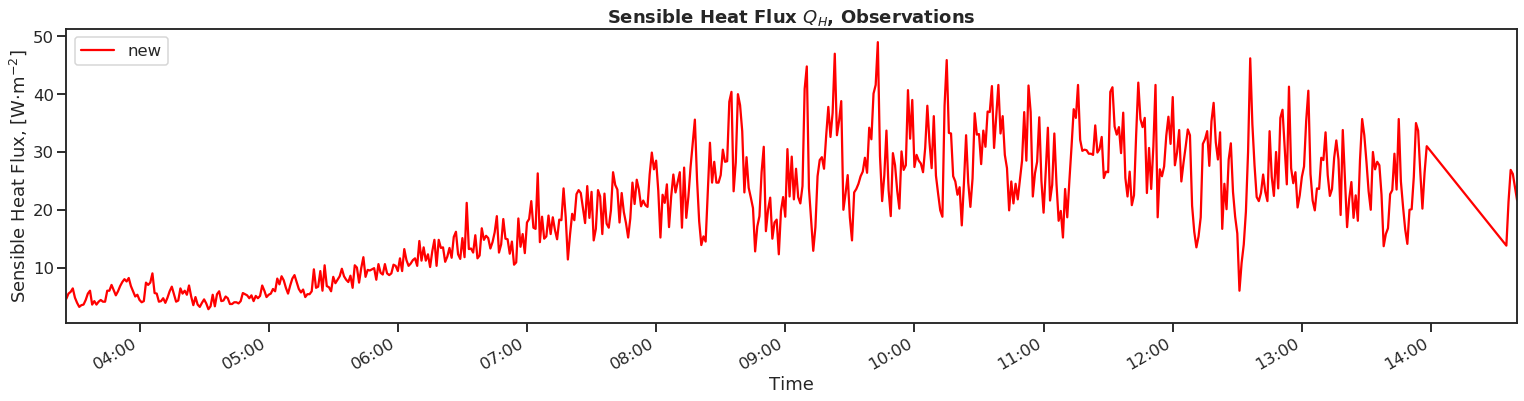

In [14]:
plt.figure(figsize=(26, 6))
#scint_data_old["H_convection"].plot(color="black", label="old")
(scint_data_new["H_convection"].loc[scint_data_new["Cn2"]<800]).plot(color="red", label="new")

plt.legend(loc="upper left")
plt.title(r"Sensible Heat Flux $Q_{H}$, Observations", fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Sensible Heat Flux, [W$\cdot$m$^{-2}$]")
ax = plt.gca()
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))  # hours and minutes
plt.show()

In [6]:
filename="2019-05-23"
wd = dp.weather_download(filename)
wd

,t,rf,wr,wg,regen,ldred,ldstat,sonne
2019-05-23 00:15:13+00:00,11.500000,85.000000,59.000000,6.100000,0.0,1020.500000,952.000000,0.0
2019-05-23 00:16:13+00:00,11.478303,85.050070,62.237830,6.069958,0.0,1020.503338,951.998331,0.0
2019-05-23 00:17:13+00:00,11.456606,85.100139,65.475661,6.039917,0.0,1020.506676,951.996662,0.0
2019-05-23 00:18:13+00:00,11.434910,85.150209,68.713491,6.009875,0.0,1020.510014,951.994993,0.0
2019-05-23 00:19:13+00:00,11.413213,85.200278,71.951321,5.979833,0.0,1020.513352,951.993324,0.0
2019-05-23 00:20:13+00:00,11.391516,85.250348,75.189152,5.949791,0.0,1020.516690,951.991655,0.0
2019-05-23 00:21:13+00:00,11.369819,85.300417,78.426982,5.919750,0.0,1020.520028,951.989986,0.0
...,...,...,...,...,...,...,...,...
2019-05-23 23:08:13+00:00,12.384547,72.192607,313.191495,2.673013,0.0,1017.507727,949.453863,0.0
2019-05-23 23:09:13+00:00,12.357865,72.309339,312.874653,2.647999,0.0,1017.521067,949.460534,0.0


/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


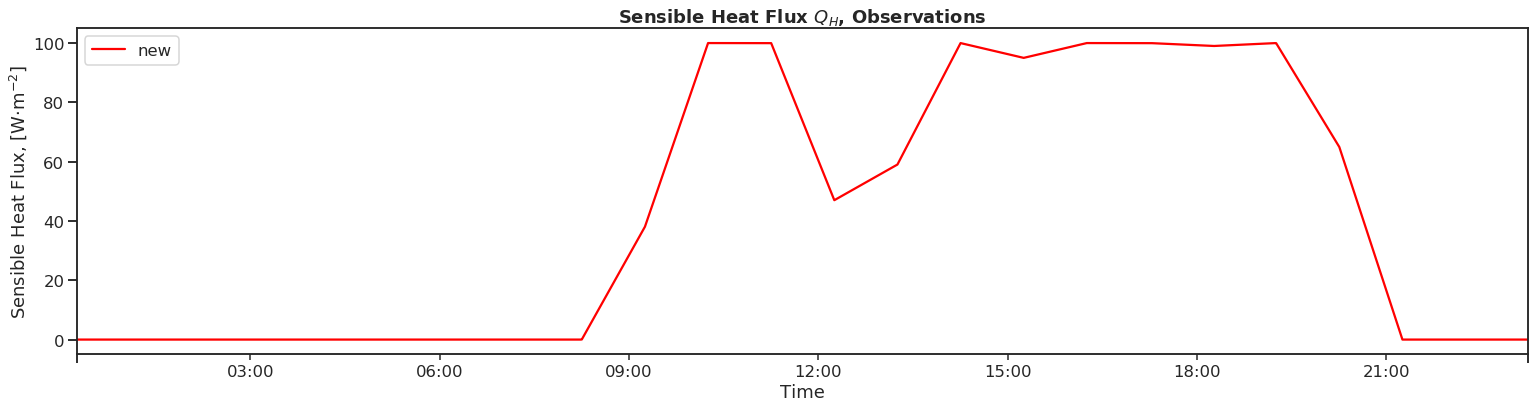

In [10]:
plt.figure(figsize=(26, 6))
# scint_data_old["Cn2"].plot(color="black", label="old")
wd["sonne"].plot(color="red", label="new")

plt.legend(loc="upper left")
plt.title(r"Sensible Heat Flux $Q_{H}$, Observations", fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Sensible Heat Flux, [W$\cdot$m$^{-2}$]")
ax = plt.gca()
# ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))  # hours and minutes
plt.show()